# Chapter 3

In [42]:
from statsmodels import api
import pandas as pd
# from IPython.display import display
import numpy as np
import sys
sys.path.append("../")

# from dstools.evaluate import ols
from scipy.stats import norm
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
sns.set_theme = 'ticks'

## Applied

### 8. `Auto`的OLS

This question involves the use of simple linear regression on theAutodata set.

(a) Use the `lm()` function to perform a simple linear regression withmpgas the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:

i.Is there a relationship between the predictor and the re-sponse?

> 是。

ii.How strong is the relationship between the predictor and the response?

> 有影响。

iii.Is the relationship between the predictor and the response positive or negative?

> negative.




In [2]:
auto = pd.read_csv("datasets/Auto.csv")
auto_ols_df = auto[auto['horsepower'] != "?"]
auto_ols_df['horsepower'] = auto_ols_df.horsepower.astype(float)
auto_ols_model = api.OLS(
    auto_ols_df["mpg"],
    api.add_constant(auto_ols_df.horsepower)
).fit()
auto_ols_model.summary()

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           7.03e-81
Time:                        10:21:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

iv.What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

> 24


In [36]:
prediction_horspower_of_98 = auto_ols_model.predict(np.array([1, 98]))

se = auto_ols_model.scale
print(
    se, 
    " (",
    se + norm.ppf(0.25) * se,
    ", ",
    se + norm.ppf(0.975) * se,
    ")", sep=""
)

24.06645095367287 (7.833876461823802, 71.23582805857134)


(b) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


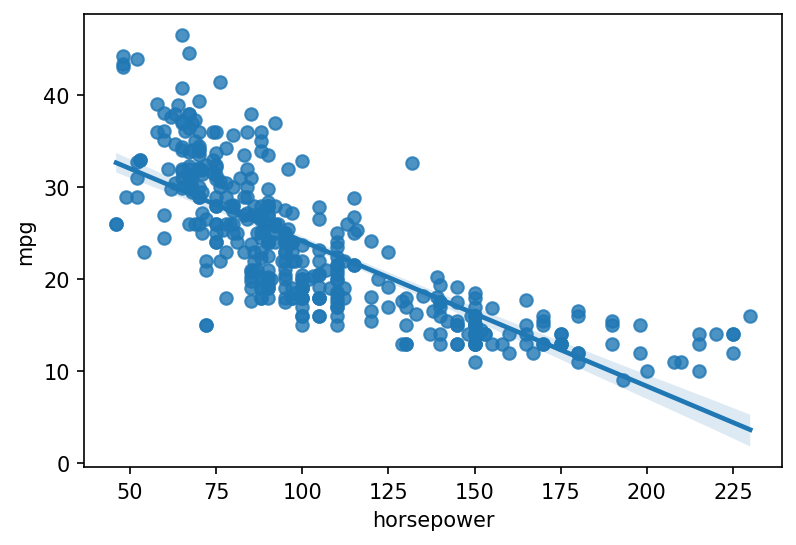

In [43]:
sns.regplot("horsepower", "mpg", data=auto_ols_df, )

(c)Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

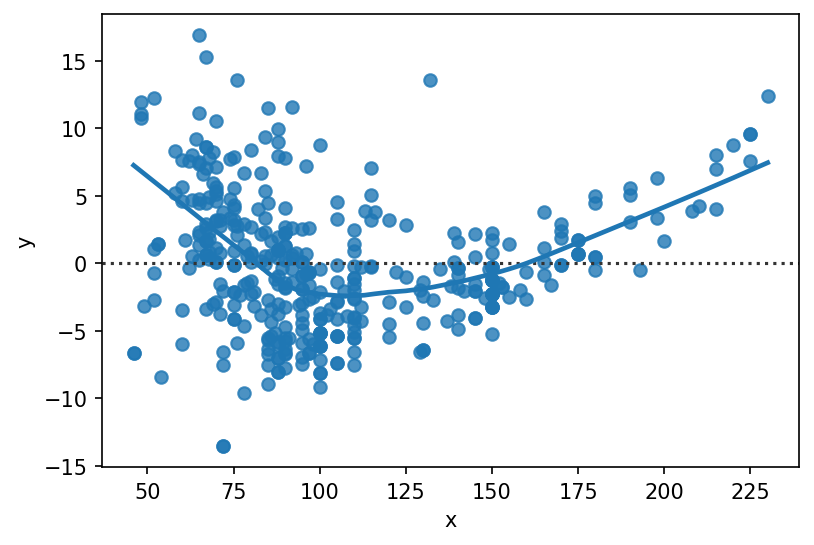

In [61]:
sns.residplot(
    x="x",
    y="y",
    data=pd.DataFrame(
        {
            "x": auto_ols_df.horsepower,
            "y": auto_ols_df.mpg
        }
    ),
    lowess=True
)

> 明显存在误差项自相关

### 9 `Auto`的多元线性回归

This question involves the use of multiple linear regression on the `Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variablesin the data set.


In [62]:
sns.pairplot(auto_ols_df)